In [121]:
# Importing the required packages for Sentiment Analysis
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [122]:
# Load the dataset and read the top 5 dataset using pandas head function

df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [123]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [124]:
# We are going to drop some columns which we not required for analysis.

data = df.drop(labels=["ProductId", "ProfileName","HelpfulnessNumerator","HelpfulnessDenominator","Time"], axis=1)

In [125]:
data

,Id,UserId,Score,Summary,Text
0,1,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
568449,568450,A28KG5XORO54AY,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,A3I8AFVPEE8KI5,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,A121AA1GQV751Z,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,A3IBEVCTXKNOH,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


/home/shekhar/.virtualenvs/cv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


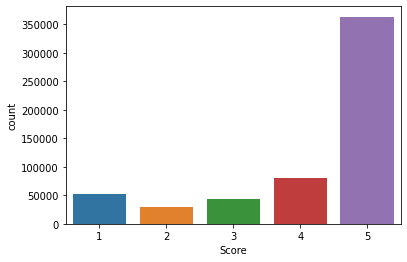

In [126]:
# Data Explanation of Score

sns.countplot(data['Score']) 
plt.show()

The above charts shows that the rating of 5 is very high which means that the data itself has a very high positive customer reviews. So, now we are going to create a positive and negative sentiments.

In [127]:
# We create a new column postive_negative which describe about the positivity (1) or negativity (0) of the reviews.
data.dropna(inplace=True)
data[data['Score'] != 3]
data['postive_negative'] = np.where(data['Score'] > 3, 1, 0)
data.head()

,Id,UserId,Score,Summary,Text,postive_negative
0,1,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...,1


In [128]:
# Creating wordclouds for positivity and negativity to know which words has more values in the reviews
# For that we create two different dataframes (positivity and negativity)

positive_reviews = data[data['postive_negative'] == 1]
negative_reviews = data[data['postive_negative'] == 0]

In [129]:
# We have seperated all positive reviews dataset from the dataframe data to positive_reviews
positive_reviews

,Id,UserId,Score,Summary,Text,postive_negative
0,1,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
2,3,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...,1
4,5,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...,1
5,6,ADT0SRK1MGOEU,4,Nice Taffy,I got a wild hair for taffy and ordered this f...,1
6,7,A1SP2KVKFXXRU1,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1
...,...,...,...,...,...,...
568448,568449,A1F6BHEYB7R6R7,5,Very large ground spice jars.,My only complaint is that there's so much of i...,1
568449,568450,A28KG5XORO54AY,5,Will not do without,Great for sesame chicken..this is a good if no...,1
568451,568452,A121AA1GQV751Z,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1
568452,568453,A3IBEVCTXKNOH,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,1


In [130]:
# We have seperated all negative reviews dataset from the dataframe data to negative_reviews
negative_reviews

,Id,UserId,Score,Summary,Text,postive_negative
1,2,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
3,4,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...,0
12,13,A327PCT23YH90,1,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,0
16,17,A3KLWF6WQ5BNYO,2,poor taste,I love eating them and they are good for watch...,0
26,27,A3RXAU2N8KV45G,1,Nasty No flavor,"The candy is just red , No flavor . Just plan...",0
...,...,...,...,...,...,...
568433,568434,A1JUG9WCN1A52Z,1,Tastes horrible!,I just bought this soup today at my local groc...,0
568434,568435,ABGQPE97ZVYJ3,2,Not so good,This soup is mostly broth. Although it has a k...,0
568435,568436,A2PSB4WQHH46HN,2,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu...",0
568446,568447,A2P9W8T7NTLG2Z,2,Mixed wrong,I had ordered some of these a few months back ...,0


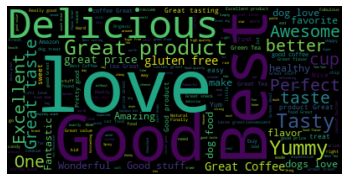

In [131]:
# Wordcloud — positive_reviews

# Create new stopword list
stopwords = set(STOPWORDS)
pos = " ".join(review for review in positive_reviews.Summary)
# pos
wordcloud = WordCloud(stopwords=stopwords).generate(pos)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




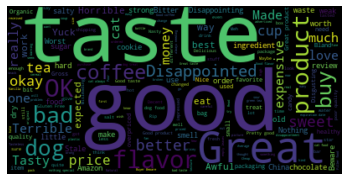

In [132]:
# Wordcloud — negative_reviews

pos = " ".join(review for review in negative_reviews.Summary)
# pos
wordcloud = WordCloud(stopwords=stopwords).generate(pos)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [133]:
# Printing the dataframe
data

,Id,UserId,Score,Summary,Text,postive_negative
0,1,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...,1
...,...,...,...,...,...,...
568449,568450,A28KG5XORO54AY,5,Will not do without,Great for sesame chicken..this is a good if no...,1
568450,568451,A3I8AFVPEE8KI5,2,disappointed,I'm disappointed with the flavor. The chocolat...,0
568451,568452,A121AA1GQV751Z,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1
568452,568453,A3IBEVCTXKNOH,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,1


In [134]:
# Building the Model


X_train, X_test, y_train, y_test = train_test_split(data['Summary'], data['postive_negative'], random_state = 0)

In [135]:
# Printing the training data
# X_train

In [136]:
# Printing the truth value
# y_train

In [137]:
# As now we have binary dependent varibale and we can apply the logistic regression algorithm on that but
# the logistic regression will not understand the text, so we need to convert the text to matrix

vectorizer = CountVectorizer()

vector = vectorizer.fit(X_train)
vector

CountVectorizer()

In [138]:
# vect.get_feature_names()[::2000]

In [139]:
len(vector.get_feature_names())


29614

In [140]:
# We going to create matrix of the text

X_train_Matrix = vector.transform(X_train)
X_train_Matrix

<426320x29614 sparse matrix of type '<class 'numpy.int64'>'
	with 1667616 stored elements in Compressed Sparse Row format>

In [141]:
len(vector.get_feature_names())


29614

In [142]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_Matrix, y_train)


/home/shekhar/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [143]:
# Prediction
prediction = model.predict(vector.transform(X_test))

In [144]:
# Testing
print(classification_report(prediction,y_test))


              precision    recall  f1-score   support

           0       0.66      0.81      0.72     25213
           1       0.96      0.91      0.93    116894

    accuracy                           0.89    142107
   macro avg       0.81      0.86      0.83    142107
weighted avg       0.90      0.89      0.90    142107



In [145]:
# Testing

print(model.predict(vector.transform(['The food is tasty', 'The food is not bad, I will buy them again'])))

[1 0]


We can see that above result, 1 is positive and other text is negative, so predict value 0.

# Now, we are going to re-train the model. But before that, we are going to do some pre-processing on the text.

In [146]:
# We are now going to remove the those words who comes less than 6 times in a document
vector = TfidfVectorizer(min_df = 6).fit(X_train)
len(vector.get_feature_names())

8927

Now we can see that our features value reduced from 29614 to 8927

In [147]:
X_train_TF = vector.transform(X_train)
model = LogisticRegression()
model.fit(X_train_TF, y_train)


/home/shekhar/.virtualenvs/cv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
# Prediction
prediction = model.predict(vector.transform(X_test))

In [149]:
# Testing
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72     24946
           1       0.96      0.91      0.93    117161

    accuracy                           0.89    142107
   macro avg       0.80      0.86      0.83    142107
weighted avg       0.90      0.89      0.89    142107



We can see that in both the classification report, there is a minor accuracy change, which is because we have not done too much text normalization. After proper text normalization, the results will be very good.

In [150]:
# Testing

print(model.predict(vector.transform(['The food is tasty', 'The food is not bad, I will buy them again'])))

[1 0]


We can see that above result, 1 is positive and other text is negative, so predict value 0.